In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn.svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import sklearn.metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

from matplotlib import pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_df = pd.read_csv('data_process1.csv')
dataset = data_df

In [3]:
#Creating k folds
def fold_i_of_k(dataset, i, k):
    n = len(dataset)
    return len(dataset[n*(i-1)//k:n*i//k])

In [26]:
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    #print(d_fold.index.values)
    #print(d_fold.iloc[1:3,0:2])
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))
    ##print(y_test)
    ##print(dataset)
    ##print(d_fold)
    ##print(d_train)
    ##print(d_test)
    ##print(len(X_train))
    ##print(len(y_train))
    ##print(X_test)
    ##print(y_test)
    #print(fold)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(X_test)
    result_pred = np.concatenate((result_pred,lr_pred))
    #print((result_pred)) 
    y_score = lr.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))
    ##print(len(y_score))
    ac = accuracy_score(y_test,lr_pred)
    print(ac)
    ##print(classification_report(y_test,lr_pred))

    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
    
total_ac = total_ac / FOLD_K
print("Cross validation accuracy is: ",total_ac)
#print(len(y))
#print(len(result_score))

Fold  1
0.728070175439
Fold  2
0.964912280702
Fold  3
0.721739130435
Fold  4
0.824561403509
Fold  5
0.878260869565
Fold  6
0.798245614035
Fold  7
0.5
Fold  8
0.660869565217
Fold  9
0.517543859649
Fold  10
0.565217391304
Cross validation accuracy is:  0.715942028986


In [21]:
#fold= fold_i_of_k(dataset,FOLD_I,FOLD_K)

Average precision-recall score: 0.65


Text(0.5,1,'2-class Precision-Recall curve: AP=0.65')

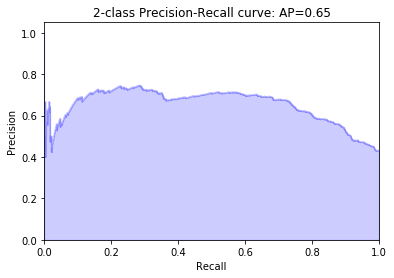

In [25]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
average_precision = average_precision_score(y, result_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y, result_score)

plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
seed = 58
results =[]

In [ ]:
#Logistic Regression- StratifiedKFold 
logcvmodel = LogisticRegression()
logcvmodel_y_pred = cross_val_predict(logcvmodel,standardized_X, y, cv=10)
results.append(logcvmodel_y_pred)
print(metrics.classification_report(y, logcvmodel_y_pred))
print(metrics.confusion_matrix(y, logcvmodel_y_pred))
#............................
log_cv_scores = cross_val_score(logcvmodel, standardized_X, y, scoring='accuracy', cv=10)
#print(log_cv_scores)
print("The accuracy on Cross validation score in Logistic Regression:",log_cv_scores.mean())

In [ ]:
#Decision Tree
dtcvmodel = DecisionTreeClassifier(random_state=seed)
dt_y_pred = cross_val_predict(dtcvmodel,standardized_X, y, cv=10)
results.append(dt_y_pred)
print(metrics.classification_report(y,dt_y_pred))
print(metrics.confusion_matrix(y, dt_y_pred))
#................................................................
dt_cv_scores = cross_val_score(dtcvmodel, standardized_X, y, scoring='accuracy', cv=10)
#print(dt_cv_scores)
print("The accuracy on cross validation score in Decision Tree:",dt_cv_scores.mean())

In [ ]:
#Random Forest
rfccvmodel = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_y_pred = cross_val_predict(rfccvmodel,standardized_X, y, cv=10)
results.append(rf_y_pred)
print(metrics.classification_report(y, rf_y_pred))
print(metrics.confusion_matrix(y, rf_y_pred))
rf_cv_scores = cross_val_score(rfccvmodel, standardized_X, y, scoring='accuracy', cv=10)
#print(rf_cv_scores)
print("The accuracy on cross validation score in Random Forest:",rf_cv_scores.mean())

In [ ]:
#Extremely Random Trees
etcvmodel = ExtraTreesClassifier(random_state=seed)
et_y_pred= cross_val_predict(etcvmodel,standardized_X, y, cv=10)
results.append(et_y_pred)
print(metrics.classification_report(y, et_y_pred))
print(metrics.confusion_matrix(y, et_y_pred))
et_cv_scores = cross_val_score(etcvmodel, standardized_X, y, scoring='accuracy', cv=10)
#print(et_cv_scores)
print("The accuracy on cross validation score in Random Forest:",et_cv_scores.mean())

In [ ]:
#SVM Linear Kernel
svmcvlinear = SVC(kernel='linear', C=45.42)
linear_cv_error = cross_val_score(svmcvlinear, standardized_X, y, cv=10)
results.append(linear_cv_error)
print(linear_cv_error,"\n***************************************************************************")
print('\nThe {}-fold cross-validation accuracy score for linear SVM classifier is {:.2f}\n'.format(10, np.average(linear_cv_error)))

In [ ]:
linearsvmclf = svmcvlinear.fit(standardized_X, y)
decision_values = linearsvmclf.decision_function(standardized_X)

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y, decision_values)

plt.plot(recall, precision, color='red')
plt.fill_between(recall, precision, step='post', alpha=0.1,color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
#SVM RBF Kernel
svmcvrbf = SVC(kernel='rbf', C= 31.21,gamma=0.00827)
rbf_cv_error = cross_val_score(svmcvrbf, standardized_X, y, cv=10)
results.append(rbf_cv_error)
print(rbf_cv_error,"\n***************************************************************************")
print('\nThe {}-fold cross-validation accuracy score for classifier is {:.2f}\n'.format(10, np.average(rbf_cv_error)))

In [ ]:
rbfsvmclf = svmcvrbf.fit(standardized_X, y)
decision_values = rbfsvmclf.decision_function(standardized_X)

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y, decision_values)

plt.plot(recall, precision, color='black')
plt.fill_between(recall, precision, step='post', alpha=0.1,color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
#SVM NPolynomial Kernel
svmcvpoly = SVC(kernel='poly',C= 35.673,gamma=0.0422)
poly_cv_error = cross_val_score(svmcvpoly, standardized_X, y, cv=10)
results.append(poly_cv_error)
print(poly_cv_error,"\n***************************************************************************")
print('\nThe {}-fold cross-validation accuracy score for classifier is {:.2f}\n'.format(10, np.average(poly_cv_error)))

In [ ]:
polysvmclf = svmcvpoly.fit(standardized_X, y)
decision_values = polysvmclf.decision_function(standardized_X)
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y, decision_values)
plt.plot(recall, precision, color='orange',markerfacecolor='blue', markersize=12)
plt.fill_between(recall, precision, step='post', alpha=0.07,color='yellow')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
# Voting Ensemble for Classification
from sklearn import model_selection


#kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
estimators.append(('logistic', logcvmodel))
estimators.append(('randomforest', rfccvmodel))
estimators.append(('extratreeforest', etcvmodel))
estimators.append(('svmlinear', svmcvlinear))
estimators.append(('svmrbf', svmcvrbf))
estimators.append(('svmpoly', svmcvpoly))
# create the ensemble model
ensemble = VotingClassifier(estimators, voting='hard')
results = model_selection.cross_val_score(ensemble, standardized_X, y, cv=10)
print(results.mean())